# Analysis of stock returns forecasts

**Reference**: Realized GARCH models: Simpler is better (Xie & Yu, 2019)

Sample: Brazil (^BVSP)

In [1]:
# Memory clearing
rm(list=ls())

## 1. Data import

In [2]:
# Packages
install.packages('quantmod')
install.packages('tidyquant')
install.packages('PerformanceAnalytics')

library(quantmod)
library(tidyquant)
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘parallelly’, ‘prodlim’, ‘future’, ‘globals’, ‘later’, ‘gower’, ‘ipred’, ‘furrr’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘quadprog’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘slider’, ‘anytime’, ‘forecast’, ‘snakecase’, ‘PerformanceAnalytics’, ‘lazyeval’, ‘Quandl’, ‘riingo’, ‘alphavantager’, ‘timetk’, ‘timeDate’, ‘janitor’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method 

**Reading the datas (Source: Yahoo Finance)**

In [3]:
getSymbols("^BVSP", from = '2000-01-01', to = '2021-05-31') 

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Warning message:
“^BVSP contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”


[1] "^BVSP"

**Checking data frequency**

In [4]:
periodicity(BVSP)        

Daily periodicity from 2000-01-03 to 2021-05-28 

**Identifying missing values (%)**

In [5]:
round(prop.table(table(is.na(BVSP)))*100, digits = 2)       


FALSE  TRUE 
98.35  1.65 

**Removing missing values**

In [6]:
BVSP <- na.omit(BVSP)    
round(prop.table(table(is.na(BVSP)))*100, digits = 2)         


FALSE 
  100 

**Removing unnecessary features**

In [7]:
BVSP.df <- BVSP[,'BVSP.Close']                              
head(BVSP.df)

           BVSP.Close
2000-01-03      16930
2000-01-04      15851
2000-01-05      16245
2000-01-06      16107
2000-01-07      16309
2000-01-10      17022

**Calculating log-returns**

In [8]:
logreturn <- log(BVSP.df$BVSP.Close/Lag(BVSP.df$BVSP.Close, 1))*100                     
head(logreturn)

           BVSP.Close
2000-01-03         NA
2000-01-04 -6.5854606
2000-01-05  2.4552579
2000-01-06 -0.8531209
2000-01-07  1.2463143
2000-01-10  4.2789522

**Aggregating the data**

In [9]:
BVSP.df$BVSP.Return <- logreturn                  
BVSP.df <- na.omit(BVSP.df)
head(BVSP.df)

           BVSP.Close BVSP.Return
2000-01-04      15851  -6.5854606
2000-01-05      16245   2.4552579
2000-01-06      16107  -0.8531209
2000-01-07      16309   1.2463143
2000-01-10      17022   4.2789522
2000-01-11      16573  -2.6731760

**Identifying missing values (%)**

In [10]:
round(prop.table(table(is.na(BVSP.df)))*100, digits = 2)       


FALSE 
  100 

## 2. Graph analysis

In [11]:
# Package
install.packages('xts')
install.packages('ggplot2')
install.packages('gridExtra')

library(xts)
library(ggplot2)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Price & Return charts**

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.



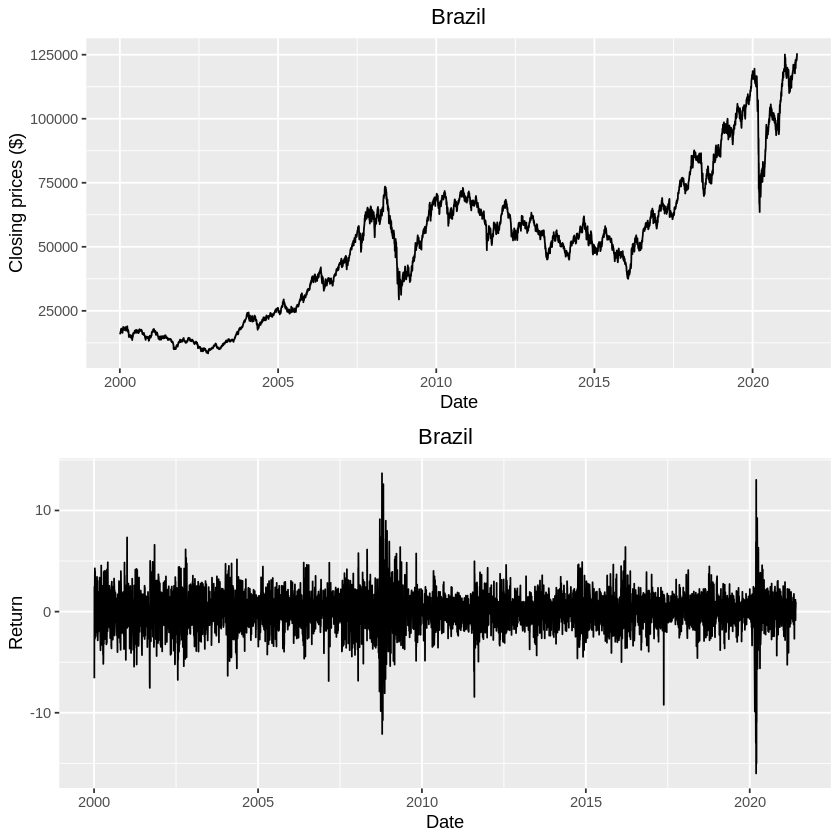

In [13]:
# Price chart
graph1 <- ggplot(BVSP.df,
                aes(x = index(BVSP.df), y = BVSP.df[,'BVSP.Close'])) +
                geom_line(color = "black") +
                ggtitle("Brazil") +
                xlab("Date") +
                ylab("Closing prices ($)") +
                theme(plot.title = element_text(hjust = 0.5))

# Return chart
graph2 <- ggplot(BVSP.df,
                aes(x = index(BVSP.df), y = BVSP.df[,'BVSP.Return'])) +
                geom_line(color = "black") +
                ggtitle("Brazil") +
                xlab("Date") +
                ylab("Return") +
                theme(plot.title = element_text(hjust = 0.5))

grid.arrange(graph1, graph2, ncol = 1, nrow = 2)

## 3. Descriptive statistic

In [14]:
# Packages
install.packages('moments')

library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘moments’


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness




**Descriptive statistic**

In [16]:
# mean
round(mean(BVSP.df$BVSP.Return), 3)                         

[1] 0.038

In [17]:
# sd
round(sd(BVSP.df$BVSP.Return), 3)                           

[1] 1.81

In [18]:
# skewness
round(skewness(BVSP.df$BVSP.Return), 3)                     

BVSP.Return 
     -0.367

In [19]:
# kurtosis
round(kurtosis(BVSP.df$BVSP.Return), 3)                     

BVSP.Return 
      9.535

In [20]:
# min
round(min(BVSP.df$BVSP.Return), 3)                          

[1] -15.993

In [21]:
# p5
round(quantile(BVSP.df$BVSP.Return, probs = 0.05), 3)       

5% 
-2.821

In [22]:
# p25
round(quantile(BVSP.df$BVSP.Return, probs = 0.25), 3)       

25% 
-0.925

In [23]:
# median
round(median(BVSP.df$BVSP.Return), 3)                       

[1] 0.076

In [24]:
# p75
round(quantile(BVSP.df$BVSP.Return, probs = 0.75), 3)       

75% 
1.075

In [25]:
# p95
round(quantile(BVSP.df$BVSP.Return, probs = 0.95), 3)       

95% 
2.676

In [26]:
# max
round(max(BVSP.df$BVSP.Return), 3)                          

[1] 13.677

In [27]:
# n observations
length(BVSP.df$BVSP.Return)                                 

[1] 5292

## 4. Series normality analysis

In [28]:
# Package
library(tseries)

In [29]:
jarque.bera.test(BVSP.df$BVSP.Return)


	Jarque Bera Test

data:  BVSP.df$BVSP.Return
X-squared = 9535.5, df = 2, p-value < 2.2e-16


## 5. Autocorrelation pattern analysis

In [30]:
# Packages
install.packages('TSA')
install.packages('aTSA')
install.packages('FinTS')

library(TSA)
library(aTSA)
library(FinTS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘TSA’


The following objects are masked from ‘package:moments’:

    kurtosis, skewness


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar



Attaching package: ‘aTSA’


The following objects are masked from ‘package:tseries’:

    adf.test, kpss.test, pp.test


The following object is masked from ‘package:graphics’:

    identify




**McLeod-Li test for conditional heteroskedasticity (ARCH effect)**

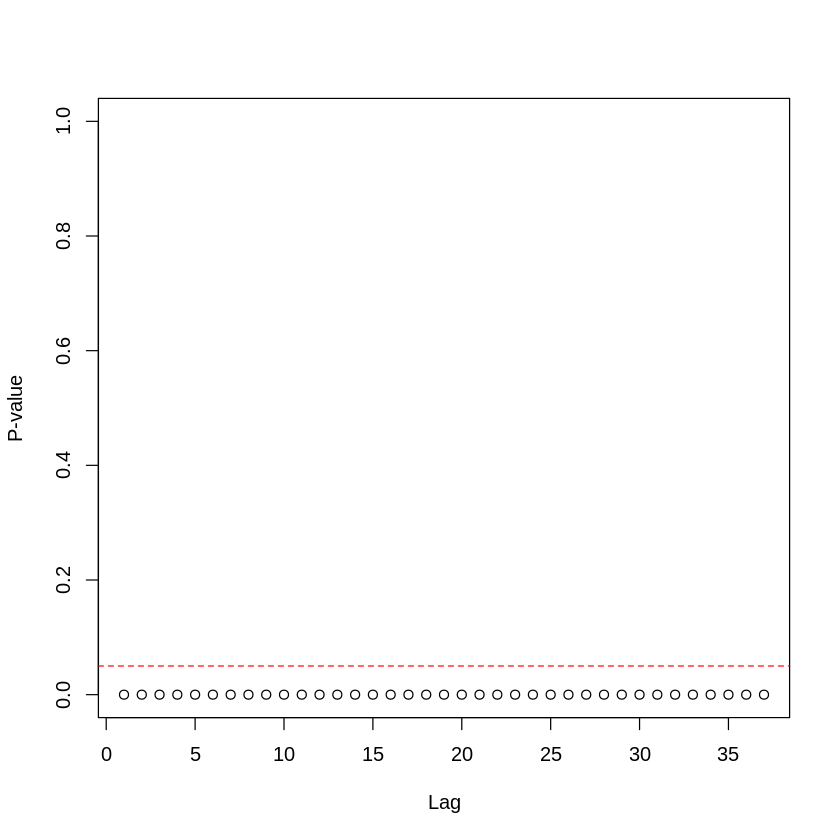

In [31]:
McLeod.Li.test(y = BVSP.df$BVSP.Return)
# p-valor < 1% => ARCH effect

**Lagrange Multiplier (LM) test for autoregressive conditional heteroscedasticity (ARCH)**

In [32]:
ArchTest(BVSP.df$BVSP.Return, demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  BVSP.df$BVSP.Return
Chi-squared = 1501.7, df = 12, p-value < 2.2e-16


## 6. GARCH model estimation

In [33]:
# Packages
install.packages('tidyverse')
install.packages('FinTS')
install.packages('texreg')
install.packages('rugarch')

library(tidyverse)
library(FinTS)
library(texreg)
library(rugarch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘misc3d’, ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘plot3D’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘nloptr’, ‘ks’, ‘spd’, ‘chron’, ‘SkewHyperbolic’


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ dplyr::combine()         masks gridExtra::combine()
✖ lubridate::date()        masks 

In [34]:
# Parameters definition
ar_lag <- 0
ma_lag <- 0
arch_lag <- 1
garch_lag <- 1

**Linear GARCH model**

In [35]:
# Specification 
garch.spec <- ugarchspec(variance.model = list(model = "sGARCH",
                                               garchOrder = c(arch_lag, garch_lag)),
                         mean.model = list(armaOrder = c(ar_lag, ma_lag)),
                         distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [36]:
# Estimation
garch.fit <- ugarchfit(spec = garch.spec, data = BVSP.df$BVSP.Return)
round(garch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0624,0.0205,3.0436,0.0023
omega,0.0670,0.0117,5.7170,0.0000
alpha1,0.0741,0.0070,10.6042,0.0000
beta1,0.9028,0.0091,98.8926,0.0000
skew,0.8982,0.0162,55.3967,0.0000


In [37]:
# Extracting variance series from the Linear GARCH model
var.garch <- ts(garch.fit@fit$sigma^2)
head(var.garch)

BVSP.df$BVSP.VolGARCH <- as.numeric(var.garch)
head(BVSP.df)

[1] 3.277609 6.298761 6.177523 5.706156 5.322318 6.188571

           BVSP.Close BVSP.Return BVSP.VolGARCH
2000-01-04      15851  -6.5854606      3.277609
2000-01-05      16245   2.4552579      6.298761
2000-01-06      16107  -0.8531209      6.177523
2000-01-07      16309   1.2463143      5.706156
2000-01-10      17022   4.2789522      5.322318
2000-01-11      16573  -2.6731760      6.188571

**EGARCH model**

In [38]:
# Specification 
egarch.spec <- ugarchspec(variance.model = list(model = "eGARCH",
                                                garchOrder = c(arch_lag, garch_lag)),
                          mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                          distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [39]:
# Estimation
egarch.fit <- ugarchfit(spec = egarch.spec, data = BVSP.df$BVSP.Return)
round(egarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0242,0.0206,1.1712,0.2415
omega,0.0286,0.0021,13.5055,0.0000
alpha1,-0.0789,0.0071,-11.0606,0.0000
beta1,0.9731,0.0008,1176.9478,0.0000
gamma1,0.1347,0.0109,12.3417,0.0000
skew,0.9035,0.0164,55.2487,0.0000


In [40]:
# Extracting variance series from the EGARCH model
var.egarch <- ts(egarch.fit@fit$sigma^2)
head(var.egarch)

BVSP.df$BVSP.VolEGARCH <- as.numeric(var.egarch)
head(BVSP.df)

[1] 3.277192 6.399338 5.935152 5.645890 5.124696 5.032972

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192
2000-01-05      16245   2.4552579      6.298761       6.399338
2000-01-06      16107  -0.8531209      6.177523       5.935152
2000-01-07      16309   1.2463143      5.706156       5.645890
2000-01-10      17022   4.2789522      5.322318       5.124696
2000-01-11      16573  -2.6731760      6.188571       5.032972

**GJR-GARCH model**

In [41]:
# Specification 
gjrgarch.spec <- ugarchspec(variance.model = list(model = "gjrGARCH",
                                                  garchOrder = c(arch_lag, garch_lag)),
                            mean.model = list(armaOrder = c(ar_lag, ma_lag)), 
                            distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution

In [42]:
# Estimation
gjrgarch.fit <- ugarchfit(spec = gjrgarch.spec, data = BVSP.df$BVSP.Return)
round(gjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0295,0.0207,1.4268,0.1536
omega,0.0792,0.0123,6.4331,0.0000
alpha1,0.0177,0.0066,2.6719,0.0075
beta1,0.9045,0.0095,95.2275,0.0000
gamma1,0.0985,0.0125,7.8685,0.0000
skew,0.9031,0.0164,54.9798,0.0000


In [43]:
# Extracting variance series from the GJR-GARCH model
var.gjrgarch <- ts(gjrgarch.fit@fit$sigma^2)
head(var.gjrgarch)

BVSP.df$BVSP.VolGJRGARCH <- as.numeric(var.gjrgarch)
head(BVSP.df)

[1] 3.277075 8.130356 7.537732 6.987840 6.426158 6.212222

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399338         8.130356
2000-01-06      16107  -0.8531209      6.177523       5.935152         7.537732
2000-01-07      16309   1.2463143      5.706156       5.645890         6.987840
2000-01-10      17022   4.2789522      5.322318       5.124696         6.426158
2000-01-11      16573  -2.6731760      6.188571       5.032972         6.212222

## 7. Realized GARCH model estimation

In [44]:
# Specification
realgarch.spec <- ugarchspec(mean.model = list(armaOrder = c(ar_lag, ma_lag),
                                               include.mean = FALSE),
                             variance.model = list(model = 'realGARCH',
                                                   garchOrder = c(arch_lag, garch_lag)),
                             distribution.model = "snorm")
# distribution.model = "snorm" => skew-normal distribution)

**Realized Linear GARCH**

In [45]:
# Estimation
realgarch.fit <- ugarchfit(realgarch.spec, BVSP.df$BVSP.Return,
                          solver = 'hybrid',
                          realizedVol = BVSP.df$BVSP.VolGARCH)
round(realgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,-0.0030,0.0376,-0.0802,0.9361
alpha1,0.9846,0.0369,26.6937,0.0000
beta1,0.0279,0.0136,2.0540,0.0400
eta11,0.0038,0.0015,2.5567,0.0106
eta21,0.0031,0.0008,4.0805,0.0000
delta,0.9687,0.0336,28.8301,0.0000
lambda,0.1058,0.0010,102.8768,0.0000
skew,0.8949,0.0159,56.2821,0.0000
xi,0.0207,0.0374,0.5554,0.5786


In [46]:
# Extracting variance series from the Realized Linear GARCH model
var.realgarch <- ts(realgarch.fit@fit$sigma^2)
head(var.realgarch)

BVSP.df$BVSP.VolRealGARCH <- as.numeric(var.realgarch)
head(BVSP.df)

[1] 3.278438 3.316379 6.311362 6.303794 5.829734 5.431581

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399338         8.130356
2000-01-06      16107  -0.8531209      6.177523       5.935152         7.537732
2000-01-07      16309   1.2463143      5.706156       5.645890         6.987840
2000-01-10      17022   4.2789522      5.322318       5.124696         6.426158
2000-01-11      16573  -2.6731760      6.188571       5.032972         6.212222
           BVSP.VolRealGARCH
2000-01-04          3.278438
2000-01-05          3.316379
2000-01-06          6.311362
2000-01-07          6.303794
2000-01-10          5.829734
2000-01-11          5.431581

**Realized EGARCH**

In [47]:
# Estimation
realegarch.fit <- ugarchfit(realgarch.spec, BVSP.df$BVSP.Return,
                            solver = 'hybrid',
                            realizedVol = BVSP.df$BVSP.VolEGARCH)
round(realegarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0127,0.0352,0.3616,0.7177
alpha1,0.9788,0.0344,28.4835,0.0000
beta1,0.0201,0.0137,1.4728,0.1408
eta11,0.0036,0.0017,2.1494,0.0316
eta21,0.0051,0.0009,5.8745,0.0000
delta,0.9770,0.0313,31.1640,0.0000
lambda,0.1208,0.0012,102.8753,0.0000
skew,0.8998,0.0160,56.1440,0.0000
xi,0.0097,0.0354,0.2738,0.7842


In [48]:
# Extracting variance series from the Realized EGARCH model
var.realegarch <- ts(realegarch.fit@fit$sigma^2)
head(var.realegarch)

BVSP.df$BVSP.VolRealEGARCH <- as.numeric(var.realegarch)
head(BVSP.df)

[1] 3.278438 3.314794 6.382861 6.007974 5.714271 5.192206

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399338         8.130356
2000-01-06      16107  -0.8531209      6.177523       5.935152         7.537732
2000-01-07      16309   1.2463143      5.706156       5.645890         6.987840
2000-01-10      17022   4.2789522      5.322318       5.124696         6.426158
2000-01-11      16573  -2.6731760      6.188571       5.032972         6.212222
           BVSP.VolRealGARCH BVSP.VolRealEGARCH
2000-01-04          3.278438           3.278438
2000-01-05          3.316379           3.314794
2000-01-06          6.311362           6.382861
2000-01-07          6.303794           6.007974
2000-01-10          5.829734           5.714271
2000-01-11          5.431581           5.192206

**Realized GJR-GARCH**

In [49]:
# Estimation
realgjrgarch.fit <- ugarchfit(realgarch.spec, BVSP.df$BVSP.Return,
                              solver = 'hybrid',
                              realizedVol = BVSP.df$BVSP.VolGJRGARCH)
round(realgjrgarch.fit@fit$matcoef, 4)

,Estimate,Std. Error,t value,Pr(>|t|)
omega,0.0206,0.0368,0.5589,0.5762
alpha1,0.9775,0.0361,27.0846,0.0000
beta1,0.0110,0.0136,0.8123,0.4166
eta11,0.0039,0.0017,2.2715,0.0231
eta21,0.0046,0.0009,5.1194,0.0000
delta,0.9871,0.0337,29.2839,0.0000
lambda,0.1231,0.0012,102.8760,0.0000
skew,0.8990,0.0161,55.7879,0.0000
xi,0.0020,0.0374,0.0541,0.9569


In [50]:
# Extracting variance series from the Realized GJR-GARCH model
var.realgjrgarch <- ts(realgjrgarch.fit@fit$sigma^2)
head(var.realgjrgarch)

BVSP.df$BVSP.VolRealGJRGARCH <- as.numeric(var.realgjrgarch)
head(BVSP.df)

[1] 3.278438 3.300075 8.022242 7.523652 6.981738 6.427358

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399338         8.130356
2000-01-06      16107  -0.8531209      6.177523       5.935152         7.537732
2000-01-07      16309   1.2463143      5.706156       5.645890         6.987840
2000-01-10      17022   4.2789522      5.322318       5.124696         6.426158
2000-01-11      16573  -2.6731760      6.188571       5.032972         6.212222
           BVSP.VolRealGARCH BVSP.VolRealEGARCH BVSP.VolRealGJRGARCH
2000-01-04          3.278438           3.278438             3.278438
2000-01-05          3.316379           3.314794             3.300075
2000-01-06          6.311362           6.382861             8.022242
2000-01-07          6.303794           6.007974             7.523652
2000-01-10          5.829734           5.714271             6.981738
2000-01-11          5.4315

## 8. Markov-Switching GARCH estimation

In [51]:
# Packages
install.packages('MSGARCH')

library(MSGARCH)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘expm’, ‘fanplot’




2 regimes: low volatility and high volatility

**Linear MS GARCH**

In [52]:
# Specification
msgarch.spec <- CreateSpec(variance.spec = list(model = c("sGARCH")),
                           distribution.spec = list(distribution = c("snorm")),
                           switch.spec = list(K = 2))

In [53]:
# Brazil
msgarch.fit <- FitML(msgarch.spec, data = BVSP.df$BVSP.Return)    
summary(msgarch.fit)

Specification type: Markov-switching
Specification name: sGARCH_snorm sGARCH_snorm
Number of parameters in each variance model: 3 3
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0351     0.0101   3.4763 2.542e-04
alpha1_1   0.0502     0.0130   3.8659 5.534e-05
beta_1     0.9298     0.0040 232.3847    <1e-16
xi_1       0.9351     0.0212  44.1838    <1e-16
alpha0_2   1.4578     0.9263   1.5739 5.776e-02
alpha1_2   0.2163     0.5752   0.3760 3.535e-01
beta_2     0.7704     0.0416  18.5273    <1e-16
xi_2       0.7102     0.1176   6.0396 7.724e-10
P_1_1      0.9776     0.2614   3.7404 9.185e-05
P_2_1      0.5015     0.0241  20.7953    <1e-16
------------------------------------------
Transition matrix:
      t+1|k=1 t+1

In [54]:
# Extracting variance series from the MS GARCH model
var.msgarch <- ts(Volatility(msgarch.fit))
head(var.msgarch)

BVSP.df$BVSP.VolMSGARCH <- as.numeric(var.msgarch)
head(BVSP.df)

t=1      t=2      t=3      t=4      t=5      t=6 
2.519228 2.781641 2.483674 2.274973 2.173013 2.625170

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399338         8.130356
2000-01-06      16107  -0.8531209      6.177523       5.935152         7.537732
2000-01-07      16309   1.2463143      5.706156       5.645890         6.987840
2000-01-10      17022   4.2789522      5.322318       5.124696         6.426158
2000-01-11      16573  -2.6731760      6.188571       5.032972         6.212222
           BVSP.VolRealGARCH BVSP.VolRealEGARCH BVSP.VolRealGJRGARCH
2000-01-04          3.278438           3.278438             3.278438
2000-01-05          3.316379           3.314794             3.300075
2000-01-06          6.311362           6.382861             8.022242
2000-01-07          6.303794           6.007974             7.523652
2000-01-10          5.829734           5.714271             6.981738
2000-01-11          5.4315

**MS EGARCH**

In [55]:
# Specification
msegarch.spec <- CreateSpec(variance.spec = list(model = c("eGARCH")),
                            distribution.spec = list(distribution = c("snorm")),
                            switch.spec = list(K = 2))

In [56]:
# Estimation
msegarch.fit <- FitML(msegarch.spec, data = BVSP.df$BVSP.Return)    
summary(msegarch.fit)

Specification type: Markov-switching
Specification name: eGARCH_snorm eGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0102     0.0033   3.1312 8.704e-04
alpha1_1   0.0732     0.0118   6.1960 2.895e-10
alpha2_1  -0.0561     0.0078  -7.2196 2.608e-13
beta_1     0.9859     0.0033 299.0567    <1e-16
xi_1       0.9253     0.0210  44.0053    <1e-16
alpha0_2   0.1211     0.0343   3.5286 2.089e-04
alpha1_2   0.0511     0.0376   1.3584 8.716e-02
alpha2_2  -0.2282     0.0499  -4.5724 2.410e-06
beta_2     0.9506     0.0155  61.3541    <1e-16
xi_2       0.8898     0.0717  12.4103    <1e-16
P_1_1      0.9910     0.0403  24.5829    <1e-16
P_2_1      0.1132     0.0036  3

In [57]:
# Extracting variance series from the MS EGARCH model
var.msegarch <- ts(Volatility(msegarch.fit))
head(var.msegarch)

BVSP.df$BVSP.VolMSEGARCH <- as.numeric(var.msegarch)
head(BVSP.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.663138 2.160653 2.058091 1.965085 1.869909 2.045523

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399338         8.130356
2000-01-06      16107  -0.8531209      6.177523       5.935152         7.537732
2000-01-07      16309   1.2463143      5.706156       5.645890         6.987840
2000-01-10      17022   4.2789522      5.322318       5.124696         6.426158
2000-01-11      16573  -2.6731760      6.188571       5.032972         6.212222
           BVSP.VolRealGARCH BVSP.VolRealEGARCH BVSP.VolRealGJRGARCH
2000-01-04          3.278438           3.278438             3.278438
2000-01-05          3.316379           3.314794             3.300075
2000-01-06          6.311362           6.382861             8.022242
2000-01-07          6.303794           6.007974             7.523652
2000-01-10          5.829734           5.714271             6.981738
2000-01-11          5.4315

**MS GJR-GARCH**

In [58]:
# Specification
msgjrgarch.spec <- CreateSpec(variance.spec = list(model = c("gjrGARCH")),
                              distribution.spec = list(distribution = c("snorm")),
                              switch.spec = list(K = 2))

In [59]:
# Estimation
msgjrgarch.fit <- FitML(msgjrgarch.spec, data = BVSP.df$BVSP.Return)    
summary(msgjrgarch.fit)

Specification type: Markov-switching
Specification name: gjrGARCH_snorm gjrGARCH_snorm
Number of parameters in each variance model: 4 4
Number of parameters in each distribution: 1 1
------------------------------------------
Fixed parameters:
None
------------------------------------------
Across regime constrained parameters:
None
------------------------------------------
Fitted parameters:
         Estimate Std. Error  t value  Pr(>|t|)
alpha0_1   0.0105     0.0173   0.6047 2.727e-01
alpha1_1   0.0197     0.0089   2.2172 1.330e-02
alpha2_1   0.0646     0.0286   2.2551 1.206e-02
beta_1     0.9328     0.0064 145.4129    <1e-16
xi_1       0.9876     0.0448  22.0612    <1e-16
alpha0_2   0.8856     0.4686   1.8899 2.939e-02
alpha1_2   0.0000     0.0002   0.0837 4.666e-01
alpha2_2   0.4893     0.2485   1.9685 2.450e-02
beta_2     0.6459     0.0663   9.7420    <1e-16
xi_2       0.7347     0.0578  12.7126    <1e-16
P_1_1      0.6567     0.0030 215.9706    <1e-16
P_2_1      0.9965     9.385

In [60]:
# Extracting variance series from the MS GJR-GARCH model
var.msgjrgarch <- ts(Volatility(msgjrgarch.fit))
head(var.msgjrgarch)

BVSP.df$BVSP.VolMSGJRGARCH <- as.numeric(var.msgjrgarch)
head(BVSP.df)

t=1      t=2      t=3      t=4      t=5      t=6 
1.850624 3.278781 2.902409 2.633716 2.327751 2.095988

           BVSP.Close BVSP.Return BVSP.VolGARCH BVSP.VolEGARCH BVSP.VolGJRGARCH
2000-01-04      15851  -6.5854606      3.277609       3.277192         3.277075
2000-01-05      16245   2.4552579      6.298761       6.399338         8.130356
2000-01-06      16107  -0.8531209      6.177523       5.935152         7.537732
2000-01-07      16309   1.2463143      5.706156       5.645890         6.987840
2000-01-10      17022   4.2789522      5.322318       5.124696         6.426158
2000-01-11      16573  -2.6731760      6.188571       5.032972         6.212222
           BVSP.VolRealGARCH BVSP.VolRealEGARCH BVSP.VolRealGJRGARCH
2000-01-04          3.278438           3.278438             3.278438
2000-01-05          3.316379           3.314794             3.300075
2000-01-06          6.311362           6.382861             8.022242
2000-01-07          6.303794           6.007974             7.523652
2000-01-10          5.829734           5.714271             6.981738
2000-01-11          5.4315

## 9. Sample split: in-sample (70%) and out-sample (30%)

In [61]:
# Total number of lines 
nrow(BVSP.df)                

[1] 5292

In [62]:
# Cut-line
round(nrow(BVSP.df)*0.7, digits = 0)

[1] 3704

In [63]:
# In-sample
BVSP.df.in <- BVSP.df[1:round(nrow(BVSP.df)*0.7, digits = 0),]
dim(BVSP.df.in)

[1] 3704   11

In [64]:
# Out-sample
BVSP.df.out <- BVSP.df[(round(nrow(BVSP.df)*0.7, digits = 0)+1):nrow(BVSP.df),]
dim(BVSP.df.out)

[1] 1588   11

# 10. Forecast - GARCH models

In [65]:
# Packages
install.packages('Metrics')
install.packages('MLmetrics')
install.packages('multDM')
install.packages('MCS')
install.packages('sandwich')
install.packages('lmtest')
install.packages('forecast')

library(Metrics)
library(MLmetrics)
library(multDM)
library(MCS)
library(sandwich)
library(lmtest)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeSeries’, ‘fastICA’, ‘gss’, ‘stabledist’, ‘fGarch’, ‘fBasics’, ‘MTS’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MLmetrics’


The following object is masked from ‘package:base’:

    Recall


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 


Attaching package

## (a) Linear GARCH

**Forecast**

In [66]:
# Model specification
garch.spec.pred <- garch.spec
setfixed(garch.spec.pred) <- as.list(coef(garch.fit))

In [67]:
# Model adjustment
garch.fit.pred <- ugarchfit(garch.spec,
                            BVSP.df$BVSP.Return,
                            out.sample = dim(BVSP.df.out)[1])

In [68]:
# Forecast calculated through adjustment
garch.pred.a <- ugarchforecast(garch.fit.pred,
                               n.ahead = 1,
                               n.roll = dim(BVSP.df.out)[1])

garch.forecast.a <- xts(sigma(garch.pred.a)[1,],
                       move(as.Date(names(sigma(garch.pred.a)[1,])), by = 1))

In [69]:
# Forecast calculated using specification
garch.pred.b <- ugarchforecast(garch.spec.pred,
                               n.ahead = 1,
                               n.roll = dim(BVSP.df.out)[1],
                               data = BVSP.df$BVSP.Return,
                               out.sample = dim(BVSP.df.out)[1])

garch.forecast.b <- xts(sigma(garch.pred.b)[1,],
                        move(as.Date(names(sigma(garch.pred.b)[1,])), by = 1))  

In [70]:
# Model filtering
garch.filt.pred <- ugarchfilter(garch.spec.pred,
                                data = BVSP.df$BVSP.Return,
                                n.old = nrow(BVSP.df) - dim(BVSP.df.out)[1])

garch.filt <- tail(sigma(garch.filt.pred), dim(BVSP.df.out)[1])                                 

In [72]:
# Comparative
colnames(garch.filt) <- 'filter'
colnames(garch.forecast.a) <- 'forecast1'
colnames(garch.forecast.b) <- 'forecast2'

garch.ftest <- cbind(garch.filt,
                    garch.forecast.a,
                    garch.forecast.b)
head(round(garch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-18 2.1477    2.1678    2.1477
2014-12-19 2.0617    2.0942    2.0617
2014-12-22 2.0720    2.1040    2.0720
2014-12-23 2.0001    2.0422    2.0001
2014-12-26 1.9586    2.0062    1.9586
2014-12-29 1.9249    1.9751    1.9249

In [73]:
sigma.garch.pred.a <- ts(garch.forecast.a[-1,])
sigma.garch.pred.b <- ts(garch.forecast.b[-1,])
sigma.garch.true <- ts(BVSP.df.out$BVSP.VolGARCH)

sigma.garch <- na.omit(cbind(sigma.garch.pred.a, 
                            sigma.garch.pred.b,
                            sigma.garch.true))
head(sigma.garch)

,sigma.garch.pred.a,sigma.garch.pred.b,sigma.garch.true
1,2.094176,2.061689,4.612556
2,2.104005,2.072001,4.250562
3,2.042246,2.000053,4.293190
4,2.006214,1.958646,4.000212
5,1.975098,1.924943,3.836295
6,1.918799,1.860952,3.705407


**Performance evaluation**

In [75]:
# Forecast Error - Forecast a
garch.error.a <- sigma.garch[,'sigma.garch.pred.a'] - sigma.garch[,'sigma.garch.true']
head(garch.error.a)

A Time Series:
[1] -2.518380 -2.146557 -2.250943 -1.993998 -1.861197 -1.786608

In [76]:
# Forecast Error - Forecast 1b
garch.error.b <- sigma.garch[,'sigma.garch.pred.b'] - sigma.garch[,'sigma.garch.true']
head(garch.error.b)

A Time Series:
[1] -2.550867 -2.178561 -2.293137 -2.041566 -1.911351 -1.844455

In [77]:
# Mean Square Error Loss - Forecast a
garch.mse.a <- MSE(sigma.garch[,'sigma.garch.pred.a'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mse.a, digits = 3)     

[1] 20.976

In [78]:
# Mean Square Error Loss - Forecast b
garch.mse.b <- MSE(sigma.garch[,'sigma.garch.pred.b'],
                  sigma.garch[,'sigma.garch.true'])
round(garch.mse.b, digits = 3) 

[1] 21.051

In [79]:
# Mean Absolute Error Loss - Forecast a
garch.mae.a <- MAE(sigma.garch[,'sigma.garch.pred.a'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mae.a, digits = 3)

[1] 1.361

In [80]:
# Mean Absolute Error Loss - Forecast b
garch.mae.b <- MAE(sigma.garch[,'sigma.garch.pred.b'], 
                  sigma.garch[,'sigma.garch.true'])
round(garch.mae.b, digits = 3)

[1] 1.378

In [81]:
# Root Mean Square Error Loss - Forecast a
garch.rmse.a <- RMSE(sigma.garch[,'sigma.garch.pred.a'], 
                    sigma.garch[,'sigma.garch.true'])
round(garch.rmse.a, digits = 3)

[1] 4.58

In [82]:
# Root Mean Square Error Loss - Forecast b
garch.rmse.b <- RMSE(sigma.garch[,'sigma.garch.pred.b'], 
                    sigma.garch[,'sigma.garch.true'])
round(garch.rmse.b, digits = 3)

[1] 4.588

In [84]:
# Quasi-likelihood loss function - forecast a
h <- BVSP.df.out$BVSP.VolGARCH

h.hat.a <- garch.forecast.a[-1,]     
garch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(garch.qlike.a, digits = 5) 

[1] 1.40877

In [85]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- garch.forecast.b[-1,]
garch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(garch.qlike.b, digits = 5)   

[1] 1.39994

In [86]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- garch.forecast.a
f.b <- garch.forecast.b
y <- BVSP.df.out$BVSP.VolGARCH

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -0.80494, forecast horizon = 1, p-value = 0.4209
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [87]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- garch.error.a
e.b <- garch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -1.6188, Forecast horizon = 1, Loss function power = 2, p-value =
0.1057
alternative hypothesis: two.sided


In [88]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
garch.qlike.a <- mean(LossVol(sigma.garch[,'sigma.garch.true'],
                              sigma.garch[,'sigma.garch.pred.a'],
                              which = "QLIKE"))
round(garch.qlike.a, digits = 3)

[1] 3.73

In [89]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast 1b
garch.qlike.b <- mean(LossVol(sigma.garch[,'sigma.garch.true'],
                              sigma.garch[,'sigma.garch.pred.b'],
                              which = "QLIKE"))
round(garch.qlike.b, digits = 3)

[1] 3.781

In [90]:
# Log loss / Cross-Entropy Loss -  forecast a
garch.logloss.a <- LogLoss(sigma.garch[,'sigma.garch.pred.a'],
                           sigma.garch[,'sigma.garch.true'])
round(garch.logloss.a, digits = 3)

[1] -67.003

In [91]:
# Log loss / Cross-Entropy Loss -  forecast b
garch.logloss.b <- LogLoss(sigma.garch[,'sigma.garch.pred.b'],
                           sigma.garch[,'sigma.garch.true'])
round(garch.logloss.b, digits = 3)

[1] -67.003

In [92]:
# Linear regression to assess forecast performance - forecast a
garch.model.a <- lm(sigma.garch.true ~ sigma.garch.pred.a, 
                    data = sigma.garch)
round(coeftest(garch.model.a, NeweyWest(garch.model.a,
                                        lag = bwNeweyWest(garch.model.a),
                                        prewhite = F)), 3)
round(summary(garch.model.a)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -7.652      1.167  -6.557 < 2.2e-16 ***
sigma.garch.pred.a    6.692      0.785   8.521 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.881

In [93]:
# Linear regression to assess forecast performance - forecast b
garch.model.b <- lm(sigma.garch.true ~ sigma.garch.pred.b, 
                    data = sigma.garch)
round(coeftest(garch.model.b, NeweyWest(garch.model.b,
                                        lag = bwNeweyWest(garch.model.b),
                                        prewhite = F)), 3)
round(summary(garch.model.b)$adj.r.squared, 3)


t test of coefficients:

                   Estimate Std. Error t value  Pr(>|t|)    
(Intercept)          -7.797      1.056  -7.380 < 2.2e-16 ***
sigma.garch.pred.b    6.852      0.716   9.574 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.896

##(b) EGARCH

**Forecast**

In [94]:
# Model specification
egarch.spec.pred <- egarch.spec
setfixed(egarch.spec.pred) <- as.list(coef(egarch.fit))

In [95]:
# Model adjustment
egarch.fit.pred <- ugarchfit(egarch.spec,
                             BVSP.df$BVSP.Return,
                             out.sample = dim(BVSP.df.out)[1])

In [96]:
# Forecast calculated through adjustment
egarch.pred.a <- ugarchforecast(egarch.fit.pred,
                                n.ahead = 1,
                                n.roll = dim(BVSP.df.out)[1])

egarch.forecast.a <- xts(sigma(egarch.pred.a)[1,],
                         move(as.Date(names(sigma(egarch.pred.a)[1,])), by = 1))

In [97]:
# Forecast calculated using specification
egarch.pred.b <- ugarchforecast(egarch.spec.pred,
                                n.ahead = 1,
                                n.roll = dim(BVSP.df.out)[1],
                                data = BVSP.df$BVSP.Return,
                                out.sample = dim(BVSP.df.out)[1])

egarch.forecast.b <- xts(sigma(egarch.pred.b)[1,],
                         move(as.Date(names(sigma(egarch.pred.b)[1,])), by = 1))               

In [98]:
# Model filtering
egarch.filt.pred <- ugarchfilter(egarch.spec.pred,
                                data = BVSP.df$BVSP.Return,
                                n.old = nrow(BVSP.df) - dim(BVSP.df.out)[1])

egarch.filt <- tail(sigma(egarch.filt.pred), dim(BVSP.df.out)[1]) 

In [99]:
# Comparative
colnames(egarch.filt) <- 'filter'
colnames(egarch.forecast.a) <- 'forecast1'
colnames(egarch.forecast.b) <- 'forecast2'

egarch.ftest <- cbind(egarch.filt, 
                      egarch.forecast.a,
                      egarch.forecast.b)
head(round(egarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-18 2.2794    2.3151    2.2794
2014-12-19 2.1911    2.2383    2.1911
2014-12-22 2.1244    2.1789    2.1244
2014-12-23 2.0254    2.0913    2.0254
2014-12-26 1.9502    2.0229    1.9502
2014-12-29 1.9989    2.0631    1.9989

In [100]:
sigma.egarch.pred.a <- ts(egarch.forecast.a[-1,])
sigma.egarch.pred.b <- ts(egarch.forecast.b[-1,])
sigma.egarch.true <- ts(BVSP.df.out$BVSP.VolEGARCH)

sigma.egarch <- na.omit(cbind(sigma.egarch.pred.a,
                              sigma.egarch.pred.b,
                              sigma.egarch.true))
head(sigma.egarch)

,sigma.egarch.pred.a,sigma.egarch.pred.b,sigma.egarch.true
1,2.238324,2.191107,5.195683
2,2.178901,2.124372,4.800948
3,2.091286,2.025405,4.512957
4,2.022900,1.950204,4.102263
5,2.063057,1.998877,3.803295
6,1.982182,1.908976,3.995508


**Performance evaluation**

In [101]:
# Forecast Error - Forecast a
egarch.error.a <- sigma.egarch[,'sigma.egarch.pred.a'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error.a)

A Time Series:
[1] -2.957360 -2.622047 -2.421671 -2.079363 -1.740239 -2.013326

In [102]:
# Forecast Error - Forecast b
egarch.error.b <- sigma.egarch[,'sigma.egarch.pred.b'] - sigma.egarch[,'sigma.egarch.true']
head(egarch.error.b)

A Time Series:
[1] -3.004577 -2.676576 -2.487552 -2.152060 -1.804419 -2.086532

In [103]:
# Mean Square Error Loss - Forecast a
egarch.mse.a <- MSE(sigma.egarch[,'sigma.egarch.pred.a'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse.a, digits = 3)     

[1] 12.801

In [104]:
# Mean Square Error Loss - Forecast b
egarch.mse.b <- MSE(sigma.egarch[,'sigma.egarch.pred.b'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mse.b, digits = 3) 

[1] 12.883

In [105]:
# Mean Absolute Error Loss - Forecast a
egarch.mae.a <- MAE(sigma.egarch[,'sigma.egarch.pred.a'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae.a, digits = 3)

[1] 1.213

In [106]:
# Mean Absolute Error Loss - Forecast b
egarch.mae.b <- MAE(sigma.egarch[,'sigma.egarch.pred.b'],
                    sigma.egarch[,'sigma.egarch.true'])
round(egarch.mae.b, digits = 3)

[1] 1.22

In [107]:
# Root Mean Square Error Loss - Forecast a
egarch.rmse.a <- RMSE(sigma.egarch[,'sigma.egarch.pred.a'],
                      sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse.a, digits = 3)

[1] 3.578

In [108]:
# Root Mean Square Error Loss - Forecast b
egarch.rmse.b <- RMSE(sigma.egarch[,'sigma.egarch.pred.b'],
                      sigma.egarch[,'sigma.egarch.true'])
round(egarch.rmse.b, digits = 3)

[1] 3.589

In [109]:
# Quasi-likelihood loss function - forecast a
h <- BVSP.df.out$BVSP.VolEGARCH

h.hat.a <- egarch.forecast.a[-1,]     
egarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(egarch.qlike.a, digits = 5) 

[1] 1.38414

In [110]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- egarch.forecast.b[-1,]
egarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(egarch.qlike.b, digits = 5) 

[1] 1.38396

In [111]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- egarch.forecast.a
f.b <- egarch.forecast.b
y <- BVSP.df.out$BVSP.VolEGARCH

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -0.98075, forecast horizon = 1, p-value = 0.3267
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [112]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- egarch.error.a
e.b <- egarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -2.071, Forecast horizon = 1, Loss function power = 2, p-value =
0.03852
alternative hypothesis: two.sided


In [113]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
egarch.qlike.a <- mean(LossVol(sigma.egarch[,'sigma.egarch.true'],
                              sigma.egarch[,'sigma.egarch.pred.a'],
                              which = "QLIKE"))
round(egarch.qlike.a, digits = 3)

[1] 3.529

In [114]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
egarch.qlike.b <- mean(LossVol(sigma.egarch[,'sigma.egarch.true'],
                              sigma.egarch[,'sigma.egarch.pred.b'],
                              which = "QLIKE"))
round(egarch.qlike.b, digits = 3)

[1] 3.562

In [115]:
# Log loss / Cross-Entropy Loss -  forecast a
egarch.logloss.a <- LogLoss(sigma.egarch[,'sigma.egarch.pred.a'],
                            sigma.egarch[,'sigma.egarch.true'])
round(egarch.logloss.a, digits = 3)

[1] -60.419

In [116]:
# Log loss / Cross-Entropy Loss -  forecast b
egarch.logloss.b <- LogLoss(sigma.egarch[,'sigma.egarch.pred.b'],
                            sigma.egarch[,'sigma.egarch.true'])
round(egarch.logloss.b, digits = 3)

[1] -60.418

In [117]:
# Linear regression to assess forecast performance - forecast a
egarch.model.a <- lm(sigma.egarch.true ~ sigma.egarch.pred.a, 
                    data = sigma.egarch)
round(coeftest(egarch.model.a, NeweyWest(egarch.model.a,
                                        lag = bwNeweyWest(egarch.model.a),
                                        prewhite = F)), 3)
round(summary(egarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -6.181      1.288  -4.800 < 2.2e-16 ***
sigma.egarch.pred.a    5.788      0.875   6.612 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.849

In [118]:
# Linear regression to assess forecast performance - forecast b
egarch.model.b <- lm(sigma.egarch.true ~ sigma.egarch.pred.b, 
                    data = sigma.egarch)
round(coeftest(egarch.model.b, NeweyWest(egarch.model.b,
                                        lag = bwNeweyWest(egarch.model.b),
                                        prewhite = F)), 3)
round(summary(egarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                    Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           -6.420      1.225  -5.241 < 2.2e-16 ***
sigma.egarch.pred.b    5.957      0.831   7.170 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.855

##(c) GJR-GARCH

**Forecast**

In [119]:
# Model specification
gjrgarch.spec.pred <- gjrgarch.spec
setfixed(gjrgarch.spec.pred) <- as.list(coef(gjrgarch.fit))

In [120]:
# Model adjustment
gjrgarch.fit.pred <- ugarchfit(gjrgarch.spec,
                              BVSP.df$BVSP.Return,
                              out.sample = dim(BVSP.df.out)[1])

In [121]:
# Forecast calculated through adjustment
gjrgarch.pred.a <- ugarchforecast(gjrgarch.fit.pred,
                                 n.ahead = 1,
                                 n.roll = dim(BVSP.df.out)[1])

gjrgarch.forecast.a <- xts(sigma(gjrgarch.pred.a)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred.a)[1,])), by = 1))

In [122]:
# Forecast calculated using specification
gjrgarch.pred.b <- ugarchforecast(gjrgarch.spec.pred,
                                  n.ahead = 1,
                                  n.roll = dim(BVSP.df.out)[1],
                                  data = BVSP.df$BVSP.Return,
                                  out.sample = dim(BVSP.df.out)[1])

gjrgarch.forecast.b <- xts(sigma(gjrgarch.pred.b)[1,],
                           move(as.Date(names(sigma(gjrgarch.pred.b)[1,])), by = 1)) 

In [123]:
# Model filtering
gjrgarch.filt.pred <- ugarchfilter(gjrgarch.spec.pred,
                                   data = BVSP.df$BVSP.Return,
                                   n.old = nrow(BVSP.df) - dim(BVSP.df.out)[1])

gjrgarch.filt <- tail(sigma(gjrgarch.filt.pred), dim(BVSP.df.out)[1]) 

In [124]:
# Comparative
colnames(gjrgarch.filt) <- 'filter'
colnames(gjrgarch.forecast.a) <- 'forecast1'
colnames(gjrgarch.forecast.b) <- 'forecast2'

gjrgarch.ftest <- cbind(gjrgarch.filt, 
                        gjrgarch.forecast.a,
                        gjrgarch.forecast.b)
head(round(gjrgarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-18 2.2283    2.2488    2.2283
2014-12-19 2.1440    2.1811    2.1440
2014-12-22 2.0816    2.1235    2.0816
2014-12-23 2.0033    2.0585    2.0033
2014-12-26 1.9362    1.9998    1.9362
2014-12-29 1.9322    1.9957    1.9322

In [125]:
sigma.gjrgarch.pred.a <- ts(gjrgarch.forecast.a[-1,])
sigma.gjrgarch.pred.b <- ts(gjrgarch.forecast.b[-1,])
sigma.gjrgarch.true <- ts(BVSP.df.out$BVSP.VolGJRGARCH)

sigma.gjrgarch <- na.omit(cbind(sigma.gjrgarch.pred.a,
                                sigma.gjrgarch.pred.b,
                                sigma.gjrgarch.true))
head(sigma.gjrgarch)

,sigma.gjrgarch.pred.a,sigma.gjrgarch.pred.b,sigma.gjrgarch.true
1,2.181134,2.144047,4.965233
2,2.123483,2.081607,4.596936
3,2.058479,2.003337,4.333086
4,1.999778,1.936216,4.013357
5,1.995700,1.932160,3.748931
6,1.936492,1.862574,3.733243


**Performance evaluation**

In [126]:
# Forecast Error - Forecast a
gjrgarch.error.a <- sigma.gjrgarch[,'sigma.gjrgarch.pred.a'] - sigma.gjrgarch[,'sigma.gjrgarch.true']
head(gjrgarch.error.a)

A Time Series:
[1] -2.784099 -2.473453 -2.274606 -2.013579 -1.753231 -1.796750

In [127]:
# Forecast Error - Forecast b
gjrgarch.error.b <- sigma.gjrgarch[,'sigma.gjrgarch.pred.b'] - sigma.gjrgarch[,'sigma.gjrgarch.true']
head(gjrgarch.error.b)

A Time Series:
[1] -2.821186 -2.515329 -2.329749 -2.077142 -1.816771 -1.870668

In [128]:
# Mean Square Error Loss - Forecast a
gjrgarch.mse.a <- MSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mse.a, digits = 3)     

[1] 31.377

In [129]:
# Mean Square Error Loss - Forecast b
gjrgarch.mse.b <- MSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mse.b, digits = 3) 

[1] 31.465

In [130]:
# Mean Absolute Error Loss - Forecast a
gjrgarch.mae.a <- MAE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mae.a, digits = 3)

[1] 1.485

In [131]:
# Mean Absolute Error Loss - Forecast b
gjrgarch.mae.b <- MAE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                      sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.mae.b, digits = 3)

[1] 1.508

In [132]:
# Root Mean Square Error Loss - Forecast a
gjrgarch.rmse.a <- RMSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                        sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.rmse.a, digits = 3)

[1] 5.602

In [133]:
# Root Mean Square Error Loss - Forecast b
gjrgarch.rmse.b <- RMSE(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                        sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.rmse.b, digits = 3)

[1] 5.609

In [134]:
# Quasi-likelihood loss function - forecast a
h <- BVSP.df.out$BVSP.VolGJRGARCH

h.hat.a <- gjrgarch.forecast.a[-1,]     
gjrgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(gjrgarch.qlike.a, digits = 5) 

[1] 1.41138

In [135]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- gjrgarch.forecast.b[-1,]
gjrgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(gjrgarch.qlike.b, digits = 5) 

[1] 1.39837

In [136]:
# Diebold-Mariano Test (accuracy test) - test 1
f.a <- gjrgarch.forecast.a
f.b <- gjrgarch.forecast.b
y <- BVSP.df.out$BVSP.VolGJRGARCH

DM.test(f.a, f.b, y, loss.type = "SE", c = FALSE, H1 = "same")


	Diebold-Mariano test

data:  f.a and f.b and y
statistic = -0.3779, forecast horizon = 1, p-value = 0.7055
alternative hypothesis: Forecast f1 and f2 have different accuracy.


In [137]:
# Diebold-Mariano test for predictive accuracy - test 2
e.a <- gjrgarch.error.a
e.b <- gjrgarch.error.b

dm.test(e.a, e.b, alternative = "two.sided", h = 1, power = 2)


	Diebold-Mariano Test

data:  e.ae.b
DM = -1.1927, Forecast horizon = 1, Loss function power = 2, p-value =
0.2332
alternative hypothesis: two.sided


In [138]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast a
gjrgarch.qlike.a <- mean(LossVol(sigma.gjrgarch[,'sigma.gjrgarch.true'],
                                 sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                                 which = "QLIKE"))
round(gjrgarch.qlike.a, digits = 3)

[1] 3.871

In [139]:
# Quasi-likelihood Loss Function For Volatility Forecasts - forecast b
gjrgarch.qlike.b <- mean(LossVol(sigma.gjrgarch[,'sigma.gjrgarch.true'],
                                 sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                                 which = "QLIKE"))
round(gjrgarch.qlike.b, digits = 3)

[1] 3.931

In [141]:
# Log loss / Cross-Entropy Loss -  forecast a
gjrgarch.logloss.a <- LogLoss(sigma.gjrgarch[,'sigma.gjrgarch.pred.a'],
                              sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.logloss.a, digits = 3)

[1] -71.634

In [142]:
# Log loss / Cross-Entropy Loss -  forecast b
gjrgarch.logloss.b <- LogLoss(sigma.gjrgarch[,'sigma.gjrgarch.pred.b'],
                              sigma.gjrgarch[,'sigma.gjrgarch.true'])
round(gjrgarch.logloss.b, digits = 3)

[1] -71.636

In [143]:
# Linear regression to assess forecast performance - forecast a
gjrgarch.model.a <- lm(sigma.gjrgarch.true ~ sigma.gjrgarch.pred.a, 
                      data = sigma.gjrgarch)
round(coeftest(gjrgarch.model.a, NeweyWest(gjrgarch.model.a,
                                          lag = bwNeweyWest(gjrgarch.model.a),
                                          prewhite = F)), 3)
round(summary(gjrgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -8.571      1.494  -5.737 < 2.2e-16 ***
sigma.gjrgarch.pred.a    7.294      0.998   7.310 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.866

In [144]:
# Linear regression to assess forecast performance - forecast b
gjrgarch.model.b <- lm(sigma.gjrgarch.true ~ sigma.gjrgarch.pred.b, 
                      data = sigma.gjrgarch)
round(coeftest(gjrgarch.model.b, NeweyWest(gjrgarch.model.b,
                                          lag = bwNeweyWest(gjrgarch.model.b),
                                          prewhite = F)), 3)
round(summary(gjrgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                      Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             -8.706      1.264  -6.889 < 2.2e-16 ***
sigma.gjrgarch.pred.b    7.481      0.847   8.829 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.884

#11. Forecast - Realized GARCH models

##(a) Realized Linear GARCH

In [145]:
# Model specification
realgarch.spec.pred <- realgarch.spec
setfixed(realgarch.spec.pred) <- as.list(coef(realgarch.fit))

In [146]:
# Model adjustment
realgarch.fit.pred <- ugarchfit(realgarch.spec,
                                BVSP.df$BVSP.Return,
                                out.sample = dim(BVSP.df.out)[1],
                                solver = 'hybrid',
                                realizedVol = BVSP.df$BVSP.VolGARCH)

In [147]:
# Forecast calculated through adjustment
realgarch.pred.a <- ugarchforecast(realgarch.fit.pred,
                                   n.ahead = 1,
                                   n.roll = dim(BVSP.df.out)[1])

realgarch.forecast.a <- xts(sigma(realgarch.pred.a)[1,],
                            move(as.Date(names(sigma(realgarch.pred.a)[1,])), by = 1))

In [148]:
# Forecast calculated using specification
realgarch.pred.b <- ugarchforecast(realgarch.spec.pred, 
                                   n.ahead = 1, 
                                   n.roll = dim(BVSP.df.out)[1], 
                                   data = BVSP.df$BVSP.Return, 
                                   out.sample = dim(BVSP.df.out)[1], 
                                   realizedVol = BVSP.df$BVSP.VolRealGARCH)

realgarch.forecast.b <- xts(sigma(realgarch.pred.b)[1,],
                            move(as.Date(names(sigma(realgarch.pred.b)[1,])), by = 1))

In [149]:
# Model filtering
realgarch.filt.pred <- ugarchfilter(realgarch.spec.pred,
                                    data = BVSP.df$BVSP.Return,
                                    n.old = nrow(BVSP.df) - dim(BVSP.df.out)[1],
                                    realizedVol = BVSP.df$BVSP.VolRealGARCH)

realgarch.filt <- tail(sigma(realgarch.filt.pred), dim(BVSP.df.out)[1])

In [150]:
# Comparative
colnames(realgarch.filt) <- 'filter'
colnames(realgarch.forecast.a) <- 'forecast1'
colnames(realgarch.forecast.b) <- 'forecast2'

realgarch.ftest <- cbind(realgarch.filt,
                        realgarch.forecast.a,
                        realgarch.forecast.b)
head(round(realgarch.ftest, digits = 4))

           filter forecast1 forecast2
2014-12-18 2.1281    2.0614    2.1488
2014-12-19 2.0421    2.2006    2.0610
2014-12-22 2.1755    2.1135    2.2008
2014-12-23 2.0984    2.1214    2.1140
2014-12-26 2.1043    2.0566    2.1305
2014-12-29 2.0338    2.0063    2.0564

In [152]:
sigma.realgarch.pred.a <- ts(realgarch.forecast.a[-1,])
sigma.realgarch.pred.b <- ts(realgarch.forecast.b[-1,])
sigma.realgarch.true <- ts(BVSP.df.out$BVSP.VolRealGARCH)

sigma.realgarch <- na.omit(cbind(sigma.realgarch.pred.a,
                                sigma.realgarch.pred.b,
                                sigma.realgarch.true))
head(sigma.realgarch)

,sigma.realgarch.pred.a,sigma.realgarch.pred.b,sigma.realgarch.true
1,2.200643,2.061047,4.098386
2,2.113521,2.200823,4.671548
3,2.121410,2.114042,4.326113
4,2.056602,2.130456,4.359481
5,2.006326,2.056450,4.067284
6,1.971562,2.009548,3.895598


**Performance evaluation**

In [153]:
# Forecast Error - Forecast a
realgarch.error.a <- sigma.realgarch[,'sigma.realgarch.pred.a'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error.a)

A Time Series:
[1] -1.897744 -2.558028 -2.204703 -2.302879 -2.060958 -1.924036

In [154]:
# Forecast Error - Forecast b
realgarch.error.b <- sigma.realgarch[,'sigma.realgarch.pred.b'] - sigma.realgarch[,'sigma.realgarch.true']
head(realgarch.error.b)

A Time Series:
[1] -2.037339 -2.470725 -2.212072 -2.229025 -2.010835 -1.886050

In [155]:
# Mean Square Error Loss - Forecast a
realgarch.mse.a <- MSE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse.a, digits = 3)

[1] 22.877

In [156]:
# Mean Square Error Loss - Forecast b
realgarch.mse.b <- MSE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mse.b, digits = 3)

[1] 22.751

In [157]:
# Mean Absolute Error Loss - Forecast a
realgarch.mae.a <- MAE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae.a, digits = 3)

[1] 1.397

In [158]:
# Mean Absolute Error Loss - Forecast b
realgarch.mae.b <- MAE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                      sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.mae.b, digits = 3)

[1] 1.391

In [159]:
# Root Mean Square Error Loss - Forecast a
realgarch.rmse.a <- RMSE(sigma.realgarch[,'sigma.realgarch.pred.a'],
                        sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse.a, digits = 3)

[1] 4.783

In [160]:
# Root Mean Square Error Loss - Forecast b
realgarch.rmse.b <- RMSE(sigma.realgarch[,'sigma.realgarch.pred.b'],
                        sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.rmse.b, digits = 3)

[1] 4.77

In [161]:
# Quasi-likelihood loss function - forecast a
h <- BVSP.df.out$BVSP.VolRealGARCH

h.hat.a <- realgarch.forecast.a[-1,]     
realgarch.qlike.a <- mean(log(sqrt(h)) + h.hat.a/sqrt(h))
round(realgarch.qlike.a, digits = 5)

[1] 1.41847

In [162]:
# Quasi-likelihood loss function - forecast b
h.hat.b <- realgarch.forecast.b[-1,]
realgarch.qlike.b <- mean(log(sqrt(h)) + h.hat.b/sqrt(h))
round(realgarch.qlike.b, digits = 5)

[1] 1.41968

In [163]:
# Log loss / Cross-Entropy Loss -  forecast a
realgarch.logloss.a <- LogLoss(sigma.realgarch[,'sigma.realgarch.pred.a'],
                              sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.logloss.a, digits = 3)

[1] -68.77

In [164]:
# Log loss / Cross-Entropy Loss -  forecast b
realgarch.logloss.b <- LogLoss(sigma.realgarch[,'sigma.realgarch.pred.b'],
                              sigma.realgarch[,'sigma.realgarch.true'])
round(realgarch.logloss.b, digits = 3)

[1] -68.77

In [166]:
# Linear regression to assess forecast performance - forecast a
realgarch.model.a <- lm(sigma.realgarch.true ~ sigma.realgarch.pred.a,
                        data = sigma.realgarch)
round(coeftest(realgarch.model.a, NeweyWest(realgarch.model.a,
                                            lag = bwNeweyWest(realgarch.model.a),
                                            prewhite = F)), 3)
round(summary(realgarch.model.a)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -7.904      0.952  -8.305 < 2.2e-16 ***
sigma.realgarch.pred.a    6.811      0.633  10.762 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.898

In [167]:
# Linear regression to assess forecast performance - forecast b
realgarch.model.b <- lm(sigma.realgarch.true ~ sigma.realgarch.pred.b,
                        data = sigma.realgarch)
round(coeftest(realgarch.model.b, NeweyWest(realgarch.model.b,
                                            lag = bwNeweyWest(realgarch.model.b),
                                            prewhite = F)), 3)
round(summary(realgarch.model.b)$adj.r.squared, 3)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              -7.943      1.004  -7.908 < 2.2e-16 ***
sigma.realgarch.pred.b    6.832      0.666  10.264 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] 0.917

##(b) Realized EGARCH

##(c) Realized GJR-GARCH